In [1]:
import pandas as pd
import numpy
import os
import altair as alt
import altair_ally as aly
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("customer_churn_dataset-training-master.csv")
data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [3]:
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
# Convert column names to lowercase and replace spaces/camelCase with underscores
data.columns = (
    data.columns.str.strip()          # remove leading/trailing spaces
             .str.lower()           # lowercase
             .str.replace(" ", "_") # replace spaces
             .str.replace("-", "_") # replace dashes if any
)

# Save back to CSV
# data.to_csv("customers_clean.csv", index=False)

In [6]:
data.dtypes

customerid           float64
age                  float64
gender                object
tenure               float64
usage_frequency      float64
support_calls        float64
payment_delay        float64
subscription_type     object
contract_length       object
total_spend          float64
last_interaction     float64
churn                float64
dtype: object

In [7]:
data['customerid'] = data['customerid'].astype('Int64')

In [9]:
data.dtypes
data.to_csv("customers_clean.csv", index=False)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customerid         440832 non-null  Int64  
 1   age                440832 non-null  float64
 2   gender             440832 non-null  object 
 3   tenure             440832 non-null  float64
 4   usage_frequency    440832 non-null  float64
 5   support_calls      440832 non-null  float64
 6   payment_delay      440832 non-null  float64
 7   subscription_type  440832 non-null  object 
 8   contract_length    440832 non-null  object 
 9   total_spend        440832 non-null  float64
 10  last_interaction   440832 non-null  float64
 11  churn              440832 non-null  float64
dtypes: Int64(1), float64(8), object(3)
memory usage: 40.8+ MB


In [13]:
data[data['customerid'].isnull()]

,customerid,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
199295,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


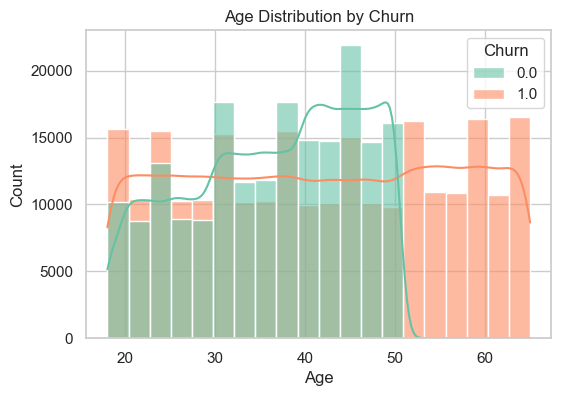

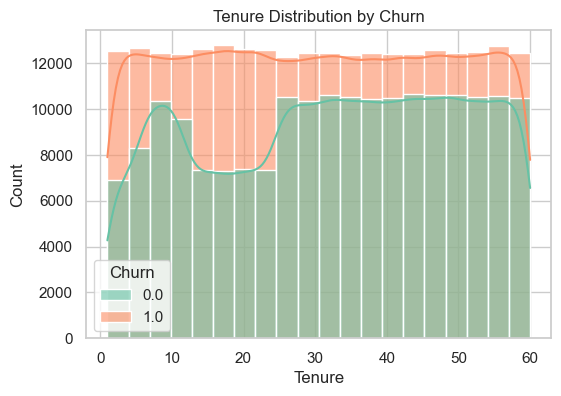

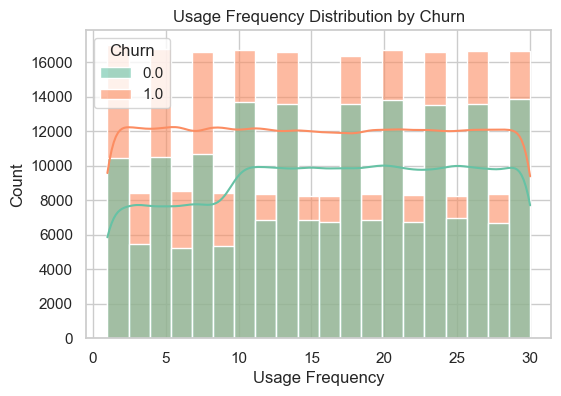

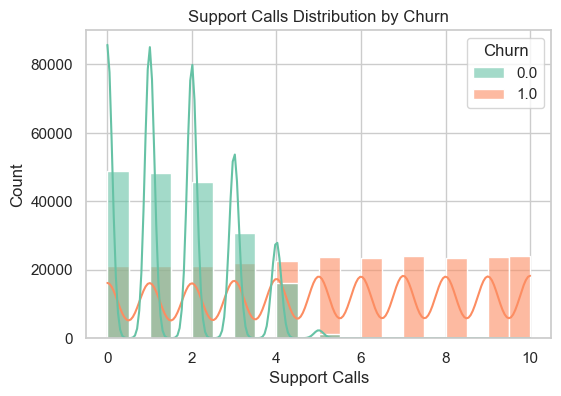

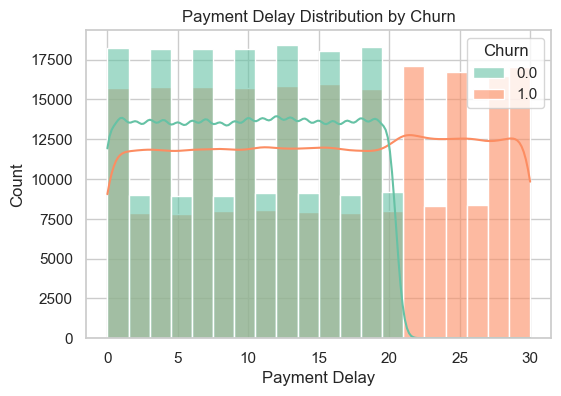

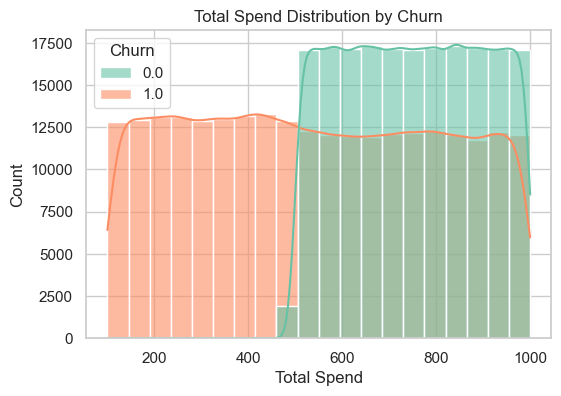

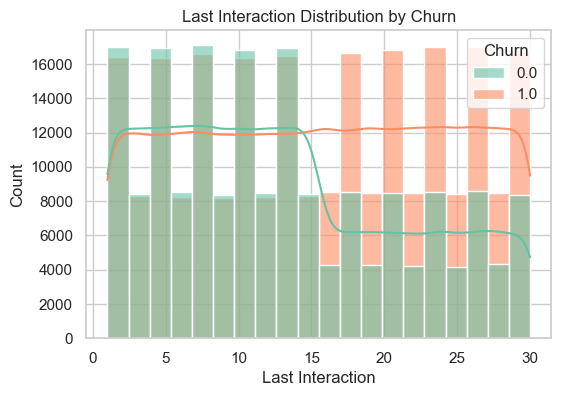

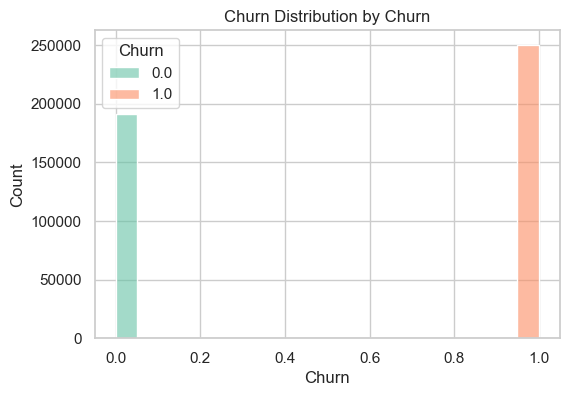

In [5]:
num_cols = data.select_dtypes(include="number").columns.drop("CustomerID")

# set style
sns.set(style="whitegrid")

# plot each numeric column
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue="Churn", bins=20, kde=True, palette="Set2", alpha=0.6)
    plt.title(f"{col} Distribution by Churn")
    plt.show()


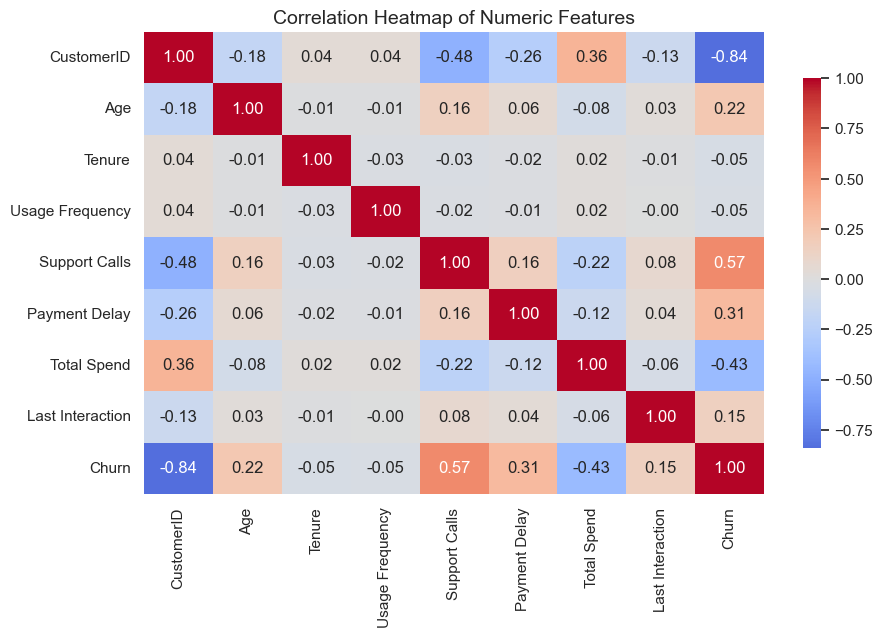

In [6]:
corr = data.select_dtypes(include="number").corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,        # show correlation values
    fmt=".2f",         # format numbers
    cmap="coolwarm",   # color scheme
    center=0,          # center colormap at 0
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()